# COURSE: A deep understanding of deep learning
## SECTION: RNN
### LECTURE: Predicting alternating sequences
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [90]:
### import libraries
import torch
import torch.nn as nn
import numpy as np

# for printing out status reports
import sys

# for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# Create temporal sequence data

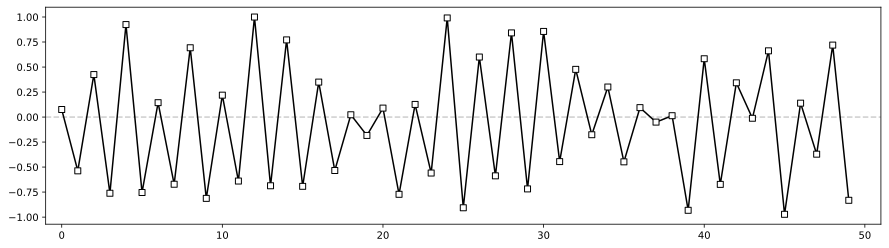

torch.Size([50])


In [91]:
# import the data
N = 50

data = torch.zeros(N)

for i in range(N):
  data[i] = torch.rand(1) * (-1)**i

plt.figure(figsize=(15,4))
plt.plot([-1,N+1],[0,0],'--',color=[.8,.8,.8])
plt.plot(data,'ks-',markerfacecolor='w')
plt.xlim([-1,N+1])
plt.show()
print(data.shape)

# Create a class for the DL model

In [92]:
class rnnnet(nn.Module):
  def __init__(self):
    super().__init__()

    # RNN Layer
    self.rnn = nn.RNN(input_size,num_hidden,num_layers)
    
    # linear layer for output
    self.out = nn.Linear(num_hidden,1)
  
  def forward(self, x):
    # print(x.shape)
    
    # initialize hidden state for first input
    # hidden = torch.zeros(num_layers,batchsize,num_hidden)
    # print(hidden.shape)

    # run through the RNN layer
    y,hidden = self.rnn(x)
    # print(y.shape,hidden.shape)
    
    y = self.out(y)
    
    return y,hidden

In [93]:
# network parameters
input_size =  3 # "channels" of data, which here correspond to successive timepoints
num_hidden =  3 # breadth of model (number of columns of hidden layers)
num_layers =  1 # depth of model (number of rows of hidden layers in the model)
seqlength  = 10 
batchsize  =  1 

# create an instance of the model and inspect
net = rnnnet()

X = torch.rand(seqlength,batchsize,input_size)
y,h = net(X)
print(y.shape)
print(h.shape)

torch.Size([10, 1, 1])
torch.Size([1, 1, 3])


In [94]:
# test the model with some data
y = net(data[:input_size].view(1,1,input_size))[0]

lossfun = nn.MSELoss()
lossfun(y,data[input_size+1].view(1,1,1))

tensor(0.4148, grad_fn=<MseLossBackward>)

# Train the model and show performance

In [95]:
# number of training epochs
numepochs = 30

# create a new instance of the model (and optimizer!)
net = rnnnet()
optimizer = torch.optim.SGD(net.parameters(),lr=.001)



# initialize losses
losses = np.zeros(numepochs)
signaccuracy = np.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):

  # loop over "batches" (runs through the data time series)
  batchlosses = []
  batchacc    = []
  for timei in range(N-input_size):

    # grab a snippet of data
    X = data[timei:timei+input_size].view(1,batchsize,input_size)
    y = data[timei+input_size].view(1,1,1)

    # forward pass and loss
    yHat,_ = net(X)
    loss = lossfun(yHat,y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss from this batch
    batchlosses.append(loss.item())

    # also get sign accuracy
    truesign = np.sign(torch.squeeze(y).numpy())
    predsign = np.sign(torch.squeeze(yHat).detach().numpy())
    accuracy = 100*np.mean(truesign==predsign)
    batchacc.append(accuracy)
  
  # average losses from this epoch
  losses[epochi] = np.mean(batchlosses)
  signaccuracy[epochi] = np.mean(batchacc)
  
  msg = f'Finished epoch {epochi+1}/{numepochs}'
  sys.stdout.write('\r' + msg)

Finished epoch 30/30

In [96]:
# examine the input and output in more detail

X = data[timei:timei+input_size].view(1,1,input_size)
y = data[timei+input_size].view(1,1,1)

print(X)
print(y)
print(' ')
print(data[timei:timei+input_size+1])

tensor([[[ 0.1389, -0.3709,  0.7195]]])
tensor([[[-0.8318]]])
 
tensor([ 0.1389, -0.3709,  0.7195, -0.8318])


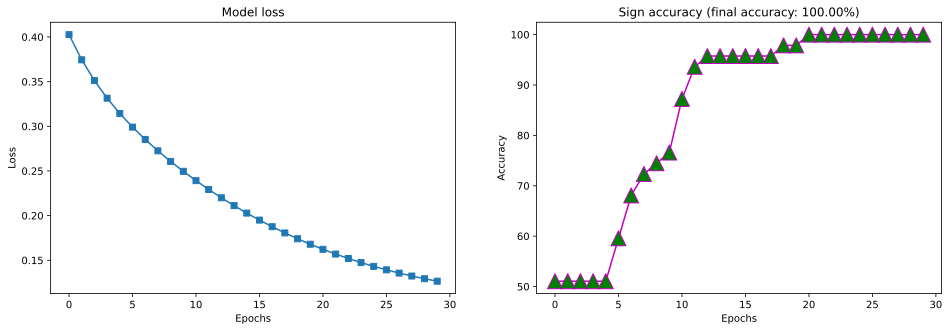

In [97]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(signaccuracy,'m^-',markerfacecolor='g',markersize=15)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Sign accuracy (final accuracy: %.2f%%)'%signaccuracy[-1])

plt.show()

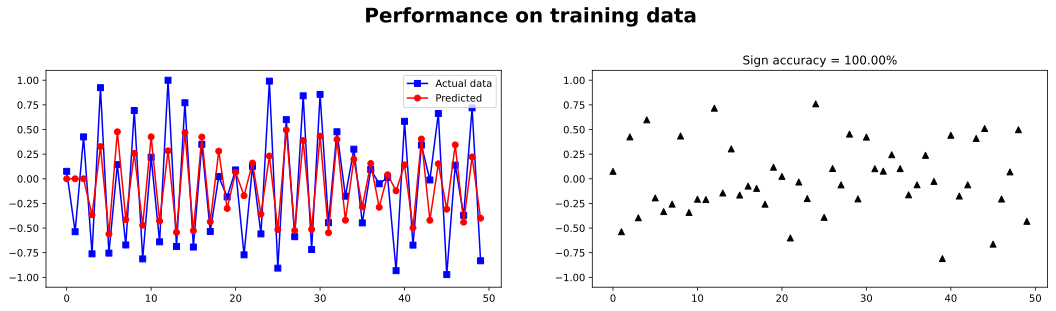

In [98]:
# now test the network!

h = np.zeros((N,num_hidden))

yHat = np.zeros(N)
for timei in range(N-input_size):

  # grab a snippet of data
  X = data[timei:timei+input_size].view(1,1,input_size)

  # forward pass and loss
  yHat[timei+input_size],hh = net(X)
  h[timei+input_size,:] = hh.detach()


# compute sign-accuracy
truesign = np.sign(data.numpy())
predsign = np.sign(yHat)

signaccuracy = 100*np.mean(truesign[input_size:]==predsign[input_size:])


fig,ax = plt.subplots(1,2,figsize=(18,4))
ax[0].plot(data,'bs-',label='Actual data')
ax[0].plot(yHat,'ro-',label='Predicted')
ax[0].set_ylim([-1.1,1.1])
ax[0].legend()

ax[1].plot(data-yHat,'k^')
ax[1].set_ylim([-1.1,1.1])
ax[1].set_title('Sign accuracy = %.2f%%' %signaccuracy)

plt.suptitle('Performance on training data',fontweight='bold',fontsize=20,y=1.1)
plt.show()

In [99]:
hh.shape

torch.Size([1, 1, 3])

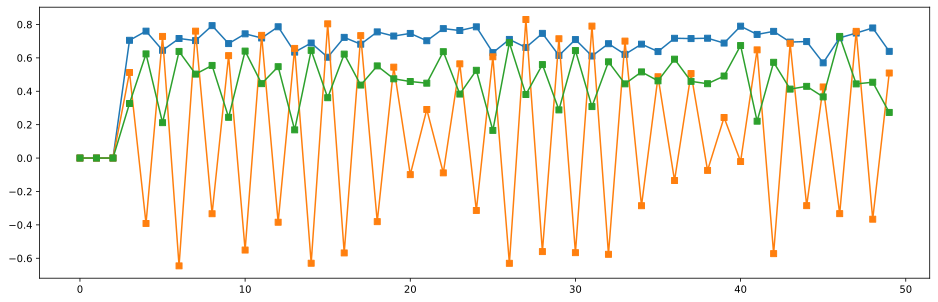

In [100]:
# show the hidden "states" (units activations)
plt.figure(figsize=(16,5))

for i in range(num_hidden):
  plt.plot(h[:,i],'s-')

# Test with new data

In [101]:
# Create new data
newdata = torch.zeros(N)
for i in range(N):
  newdata[i] = torch.rand(1) * (-1)**i

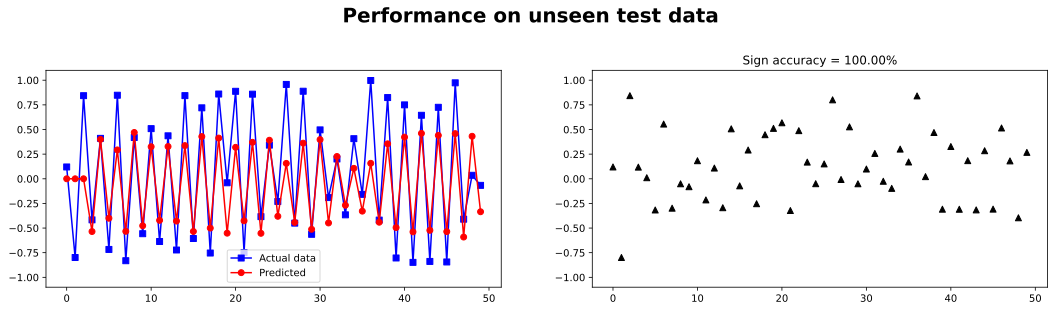

In [102]:
# now test the network!

h = np.zeros((N,num_hidden))

yHat = np.zeros(N)
for timei in range(N-input_size):

  # grab a snippet of data
  X = newdata[timei:timei+input_size].view(1,1,input_size)

  # forward pass and loss
  yHat[timei+input_size],hh = net(X)
  h[timei+input_size,:] = hh.detach()


# compute sign-accuracy
truesign = np.sign(newdata.numpy())
predsign = np.sign(yHat)
signaccuracy = 100*np.mean(truesign[input_size:]==predsign[input_size:])


fig,ax = plt.subplots(1,2,figsize=(18,4))
ax[0].plot(newdata,'bs-',label='Actual data')
ax[0].plot(yHat,'ro-',label='Predicted')
ax[0].set_ylim([-1.1,1.1])
ax[0].legend()

ax[1].plot(newdata-yHat,'k^')
ax[1].set_ylim([-1.1,1.1])
ax[1].set_title('Sign accuracy = %.2f%%' %signaccuracy)

plt.suptitle('Performance on unseen test data',fontweight='bold',fontsize=20,y=1.1)
plt.show()

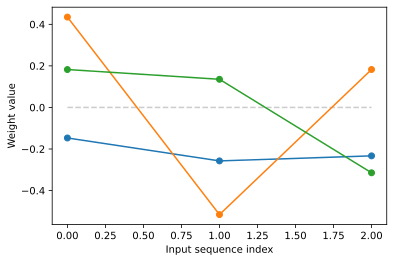

In [103]:
# plot the weights for the input->hidden layers
plt.plot(net.rnn.weight_ih_l0.detach().T,'o-')
plt.plot([0,input_size-1],[0,0],'--',color=[.8,.8,.8],zorder=0)
plt.xlabel('Input sequence index')
plt.ylabel('Weight value')
plt.show()

# Additional explorations

In [104]:
# 1) Is the model overfitting? One way to check is by setting the signs to be random instead of alternating. You can do 
#    this by modifying the data-generation code to normal random numbers without forcing the sign.
# 
# 2) The hidden state is typically initialized to zeros. Is that really the best initialization? Weights are initialized
#    to random numbers. What happens if you initialize the hidden state to randn()? Run the model several times to get a
#    sense of the general trends. Now try initializing to all 100 (instead of zeros). Why are you getting these results?
# 
# 3) The data problem here (predicting alternating signs) is actually much easier than what the performance indicates.
#    In fact, I coded this network to under-perform so there is some variability in accuracy. Make some changes to the 
#    model architecture and/or meta-parameters to boost model's performance. Can you get it to reach 100% accuracy with
#    only a few epochs?
# 